In [26]:
%load_ext memory_profiler
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA, KernelPCA
import time
from memory_profiler import profile
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE, MDS, Isomap
from sklearn.cluster import  KMeans


The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [3]:
X = np.load("data/p1/X.npy")
y = np.load("data/p1/y.npy")

In [4]:
print(X.shape)

(511, 45768)


In [5]:
np.max(X[:,0])

11.941397591320595

In [6]:
# log
X_log = np.log2(X + 1)

In [7]:
# Largest entry of first column
print(np.max(X_log[:,0]))

3.6939215228197613


In [8]:
%%timeit -n 1 -r 1
%%memit -r 1
pca =  PCA().fit(X)
pca_log = PCA().fit(X_log)

peak memory: 1531.96 MiB, increment: 975.70 MiB
5.09 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [9]:
# percentage of variance explained by first component
print("First component raw:", pca.explained_variance_ratio_[0])
print("First component log:", pca_log.explained_variance_ratio_[0])

First component raw: 0.42779670983572776
First component log: 0.13887564870826172


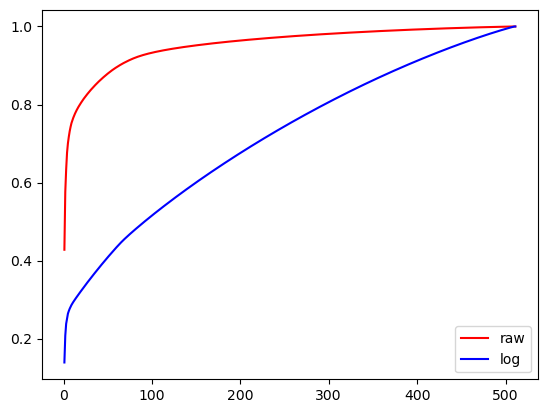

In [10]:
# cumalative variance explained plots
plt.plot(range(1, X.shape[0]+1), np.cumsum(pca.explained_variance_ratio_),  color="red", label="raw")
plt.plot(range(1, X.shape[0]+1), np.cumsum(pca_log.explained_variance_ratio_), color="blue", label="log")
plt.legend()
plt.show()

In [11]:
# 85% variance cutoffs
print("Raw:", np.where(np.cumsum(pca.explained_variance_ratio_) >= .85)[0][0] + 1)
print("Log:", np.where(np.cumsum(pca_log.explained_variance_ratio_) >= .85)[0][0] + 1)

Raw: 36
Log: 339


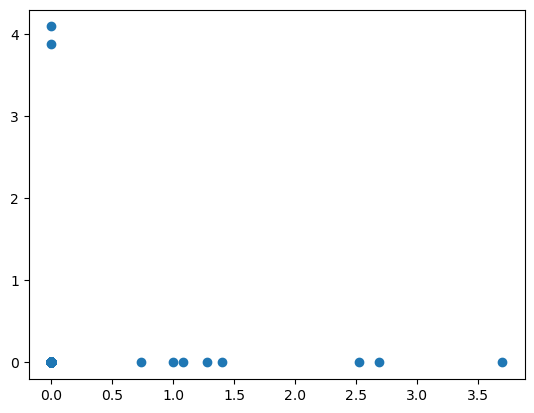

In [12]:
# plotting without visualization techniques
plt.scatter(X_log[:,0],X_log[:,1])

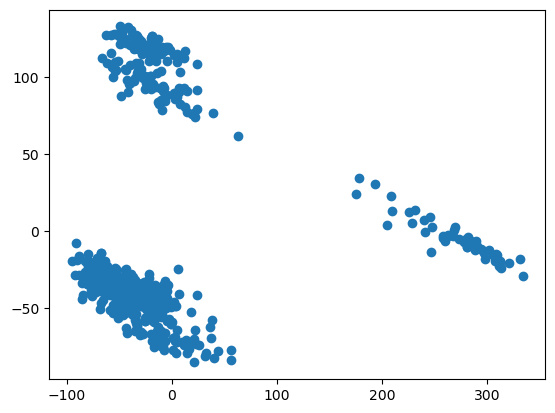

In [14]:
# PCA visualization
z = pca_log.transform(X_log)
plt.scatter(z[:,0],z[:,1])

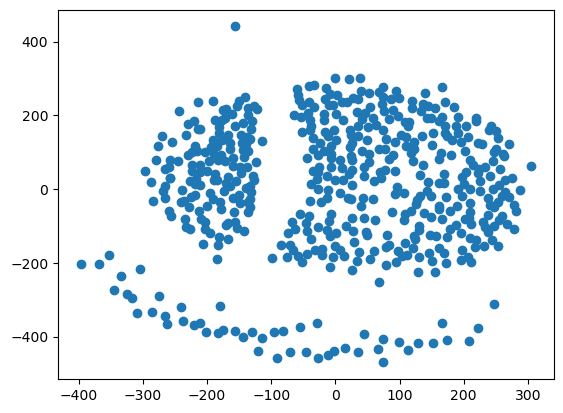

In [22]:
# MDS
mds=MDS(n_components=2).fit_transform(X_log)
plt.scatter(mds[:,0],mds[:,1])

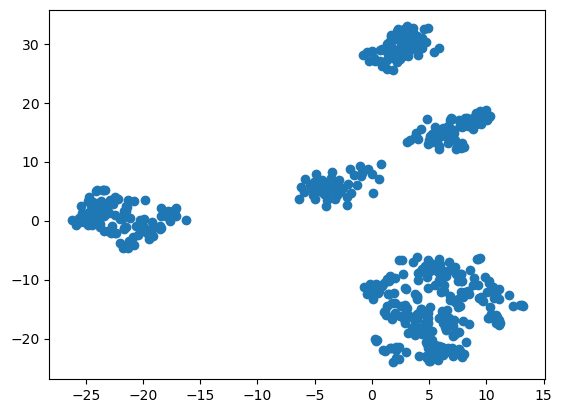

In [24]:
# T-SNE
z_tsne = TSNE(n_components=2,perplexity=40).fit_transform(z[:,0:50])
plt.scatter(z_tsne[:,0],z_tsne[:,1])

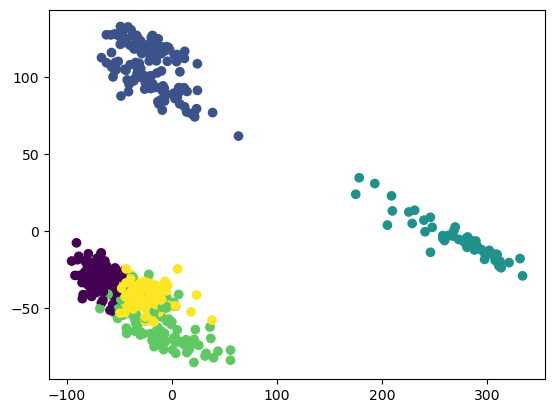

In [28]:
# K-Means
kmeans  = KMeans(5, tol=1e-6)
kmeans.fit(z[:,0:50])
plt.scatter(z[:,0],z[:,1], c=kmeans.labels_)

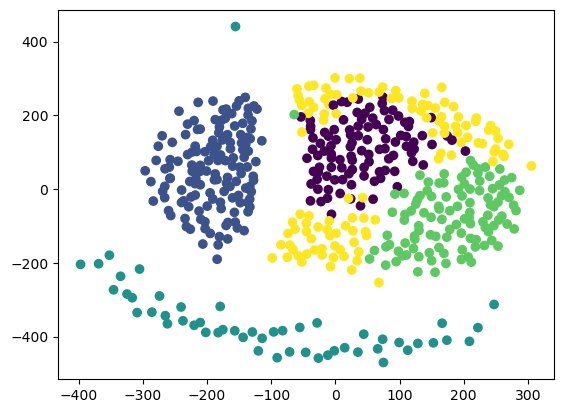

In [32]:
# clusters: MDA with Kmeans plot
plt.scatter(mds[:,0],mds[:,1],c=kmeans.labels_)

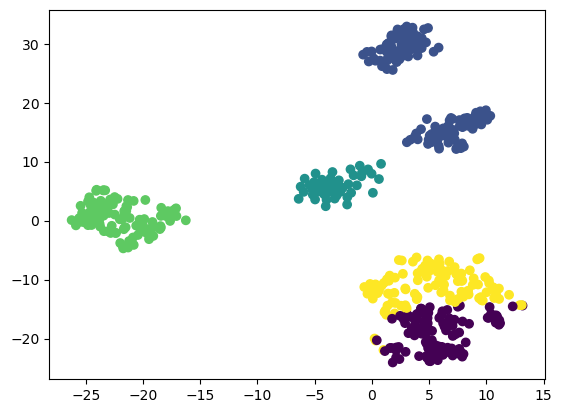

In [35]:
# T-SNE plot
plt.scatter(z_tsne[:,0],z_tsne[:,1], c=kmeans.labels_)

Num clusters 2 Insertia: 11572486.520376783
Num clusters 3 Insertia: 7257882.201193224
Num clusters 4 Insertia: 6202929.841899468
Num clusters 5 Insertia: 5962302.927148727
Num clusters 6 Insertia: 5901676.302864263
Num clusters 7 Insertia: 5592871.910557356
Num clusters 8 Insertia: 5584402.103469873
Num clusters 9 Insertia: 5179731.251092153


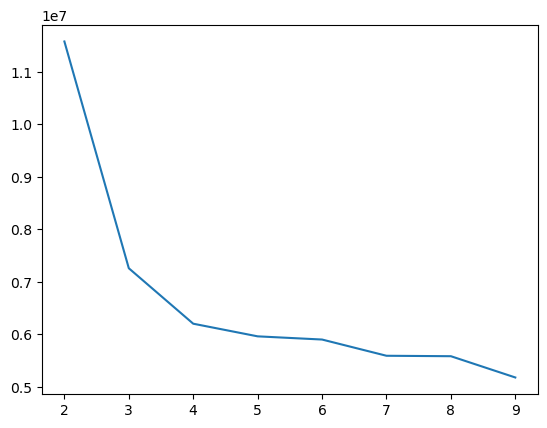

In [39]:
# Elbow Method
all_kmeans = [i for i in range(8)]
for i in range(8):
    cur_kmeans = KMeans(i+2)
    cur_kmeans.fit(z[:,0:50])
    print("Num clusters", i+2, "Insertia:", cur_kmeans.inertia_)
    all_kmeans[i] = cur_kmeans
plt.plot([i+2 for i in range(8)], [all_kmeans[i].inertia_ for i in range(8)])
    